<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/11_class_%EC%8B%A4%EC%8A%B5_%EB%AC%BC%EA%B3%A0%EA%B8%B0%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 물고기데이터로 KNN Naive Bayes 해보기 

### KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

%matplotlib inline

In [ ]:
data = pd.read_csv('Fish.csv', sep = ',')

In [ ]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df = pd.DataFrame(data)
df.info()
# df['species'] = pd.Series(data.target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [ ]:
species_dic = {'Perch':0, 'Bream':1, 'Roach':2, 'Pike':3, 'Smelt':4, 'Parkki':5, 'Whitefish':6}

In [ ]:
df['Species'] = df['Species'].map(species_dic)

In [ ]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,4,12.2,11.5,12.2,13.4,2.0904,1.3936
155,4,13.4,11.7,12.4,13.5,2.4300,1.2690
156,4,12.2,12.1,13.0,13.8,2.2770,1.2558
157,4,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
def setcolor(value):
  color = []
  colors = ['r', 'g', 'b','y','orange','c','m']
  for i in value.values:
    color.append(colors[i])
  return color

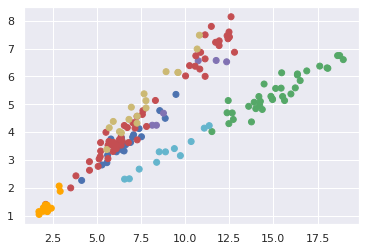

In [ ]:
plt.scatter(x=df['Height'], y=df['Width'], color = setcolor(df['Species']))


model import

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
column_train = ['Weight', 'Height']
neigh_7 = KNeighborsClassifier(n_neighbors= 7, weights='distance')


In [ ]:
neigh_7_train = neigh_7.fit(df[column_train], df['Species'])

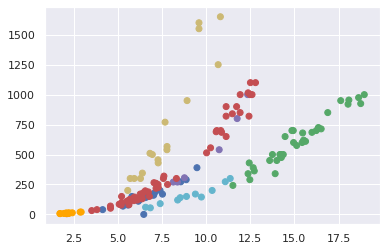

In [ ]:
plt.scatter(x=df['Height'], y=df['Weight'], color = setcolor(df['Species']))

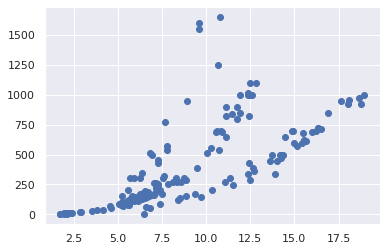

In [ ]:
plt.scatter(x=df['Height'], y=df['Weight'])

train test 나누어서 정확도 확인

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[column_train], df['Species'], test_size = 0.33)

In [ ]:
neigh7 = KNeighborsClassifier(n_neighbors=7, weights ='distance')
neigh7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
print(classification_report(y_test, neigh7.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68        23
           1       0.56      0.56      0.56         9
           2       0.17      0.40      0.24         5
           3       0.25      0.20      0.22         5
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         0

    accuracy                           0.53        53
   macro avg       0.36      0.39      0.36        53
weighted avg       0.56      0.53      0.53        53



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
neigh5 = KNeighborsClassifier(n_neighbors=5, weights ='distance')
neigh5.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
print(classification_report(y_test, neigh5.predict(X_test)))

              precision    recall  f1-score   support

           0       0.42      0.67      0.51        15
           1       0.73      0.73      0.73        15
           2       0.00      0.00      0.00         8
           3       1.00      0.33      0.50         6
           4       0.57      1.00      0.73         4
           5       0.00      0.00      0.00         3
           6       0.25      0.50      0.33         2

    accuracy                           0.53        53
   macro avg       0.42      0.46      0.40        53
weighted avg       0.49      0.53      0.48        53



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB()

In [ ]:
fish = pd.read_csv('Fish.csv', sep = ',')
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fish.iloc[:,1:], fish['Species'], test_size = 0.33)

In [ ]:
gaussian_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, gaussian_model.predict(X_test)))

              precision    recall  f1-score   support

       Bream       0.93      1.00      0.96        13
      Parkki       0.43      1.00      0.60         3
       Perch       0.00      0.00      0.00        18
        Pike       0.88      1.00      0.93         7
       Roach       0.42      0.71      0.53         7
       Smelt       1.00      0.67      0.80         3
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.57        53
   macro avg       0.52      0.63      0.55        53
weighted avg       0.48      0.57      0.51        53



In [ ]:
print(confusion_matrix(y_test, gaussian_model.predict(X_test)))

[[13  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 1  3  0  1  6  0  7]
 [ 0  0  0  7  0  0  0]
 [ 0  1  1  0  5  0  0]
 [ 0  0  1  0  0  2  0]
 [ 0  0  1  0  1  0  0]]
